# Linear Regression

This jupyter notebook has been made with a goal to practice linear regression

## Importing libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
matplotlib.style.use('dark_background')

from sklearn.linear_model import LinearRegression

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

## Functions

## DF_1

In [ ]:
! gdown --id 1YbSRBJQqEYOMn9X5X2olr3RBwDIq5qWp
! unzip /content/train_storeID_0.csv.zip

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1YbSRBJQqEYOMn9X5X2olr3RBwDIq5qWp
From (redirected): https://drive.google.com/uc?id=1YbSRBJQqEYOMn9X5X2olr3RBwDIq5qWp&confirm=t&uuid=41b42c8b-3dde-4a3d-8df3-bec06bf96707
To: /content/train_storeID_0.csv.zip
100% 99.8M/99.8M [00:00<00:00, 105MB/s]
Archive:  /content/train_storeID_0.csv.zip
  inflating: train_storeID_0.csv     


In [ ]:
df=pd.read_csv('/content/train_storeID_0.csv')
df['date']=pd.to_datetime(df['date'])
df=df.groupby('date')['sales'].sum().reset_index()
df

,date,sales
0,2011-03-25,2223.0
1,2011-03-26,3175.0
2,2011-03-27,3264.0
3,2011-03-28,2262.0
4,2011-03-29,1733.0
...,...,...
1853,2016-04-20,3722.0
1854,2016-04-21,3709.0
1855,2016-04-22,4387.0
1856,2016-04-23,5577.0


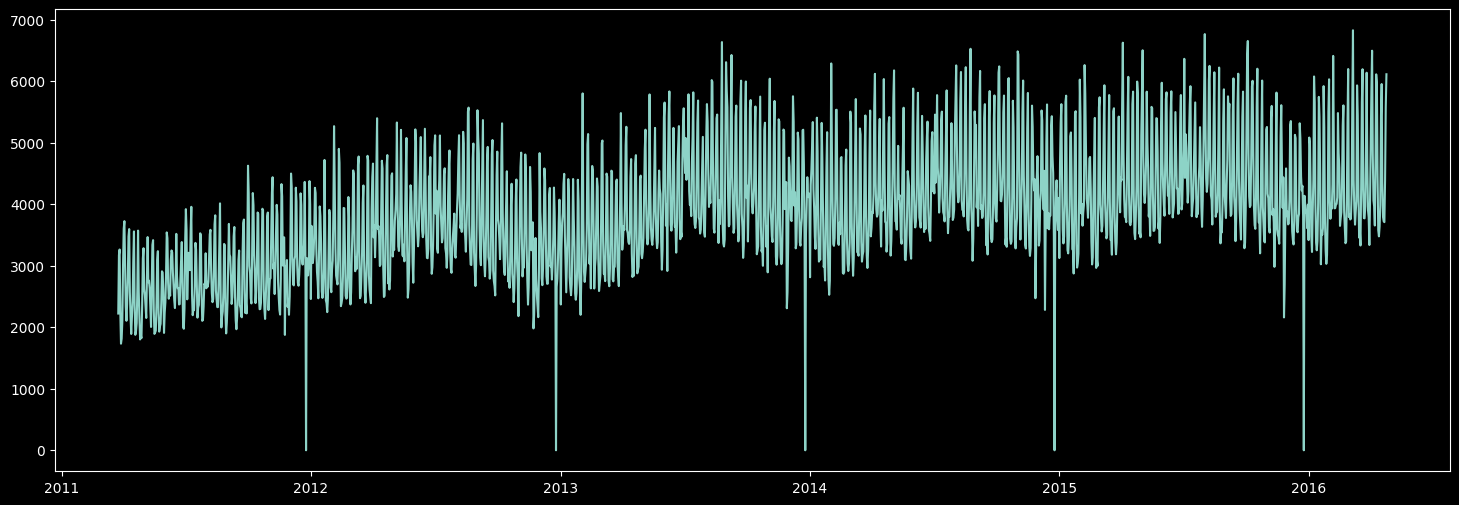

In [ ]:
fig, ax=plt.subplots(figsize=(18,6))
ax.plot(df['date'], df['sales'])
plt.show()

### Means sales per week/month plots

In [ ]:
df['month_num']=df['date'].dt.month
df['weekday_num']=df['date'].dt.dayofweek
df.groupby('weekday_num').size()

,0
weekday_num,
0,265
1,265
2,265
3,265
4,266
5,266
6,266


In [ ]:
y=[]
y.append(np.array([df['sales'].iloc[4+j] for j in range(3)]).mean())
y+=([np.array([df['sales'].iloc[4+j+k] for k in range(7)]).mean() for j in range(265)])
df_week_mean=pd.DataFrame({'week_num': range(len(y)), 'mean_week_sales': y.copy()})
df_week_mean

,week_num,mean_week_sales
0,0,1885.333333
1,1,2721.428571
2,2,2807.571429
3,3,2848.857143
4,4,2887.857143
...,...,...
261,261,3279.571429
262,262,3350.000000
263,263,3419.000000
264,264,3593.142857


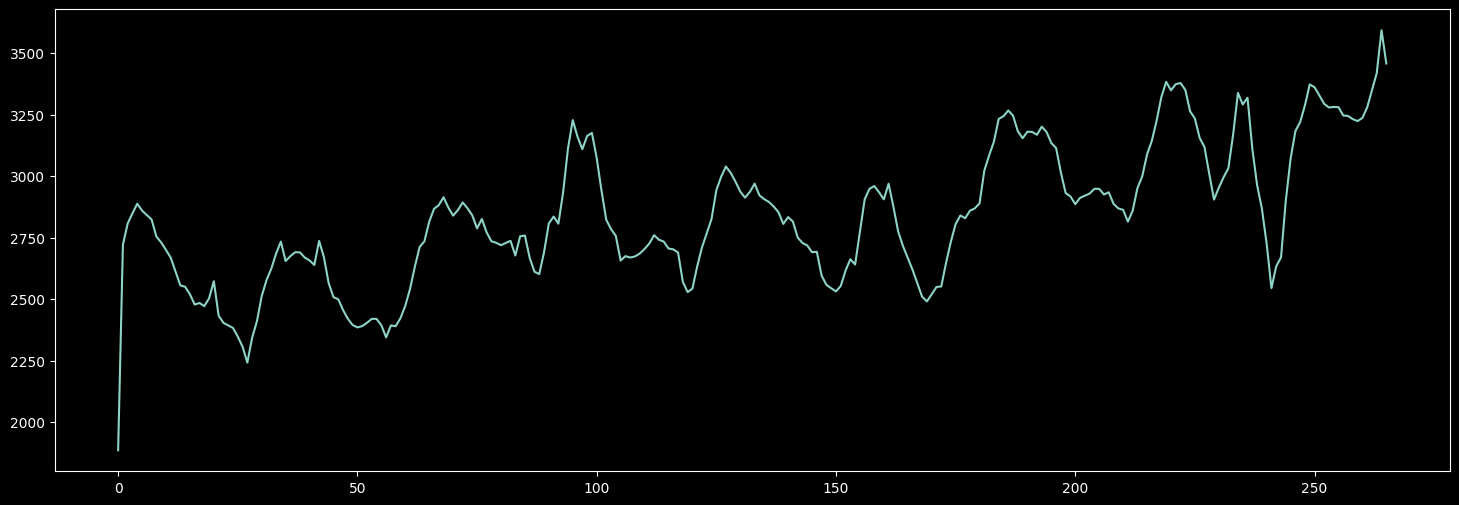

In [ ]:
fig, ax=plt.subplots(figsize=(18,6))
ax.plot(df_week_mean['week_num'], df_week_mean['mean_week_sales'])

plt.show()

In [ ]:
# Sales in week 0 looks like outlier
df_week_mean=df_week_mean[df_week_mean['week_num']>0]

<ipython-input-19-6e621206eadd>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_week_mean['mean_week_sales_log']=np.log10(df_week_mean['mean_week_sales'])


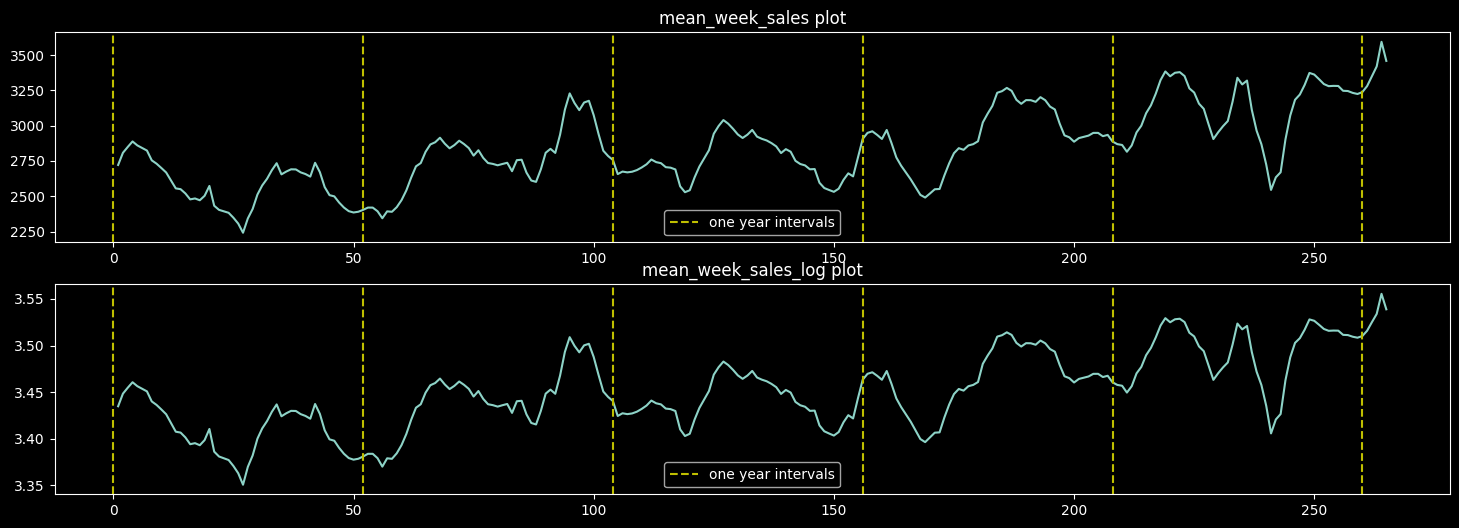

In [ ]:
fig, axs =plt.subplots(2, 1, figsize=(18,6))
axs[0].plot(df_week_mean['week_num'], (df_week_mean['mean_week_sales']))
for j in range(52, len(df_week_mean), 52):
  axs[0].axvline(x=j, color='y', linestyle='--')
axs[0].axvline(x=0, color='y', linestyle='--', label='one year intervals')
axs[0].legend()
axs[0].set_title('mean_week_sales plot')

df_week_mean['mean_week_sales_log']=np.log10(df_week_mean['mean_week_sales'])
axs[1].plot(df_week_mean['week_num'], df_week_mean['mean_week_sales_log'])
for j in range(52, len(df_week_mean), 52):
  axs[1].axvline(x=j, color='y', linestyle='--')
axs[1].axvline(x=0, color='y', linestyle='--', label='one year intervals')
axs[1].legend()
axs[1].set_title('mean_week_sales_log plot')
plt.show()

<Axes: >

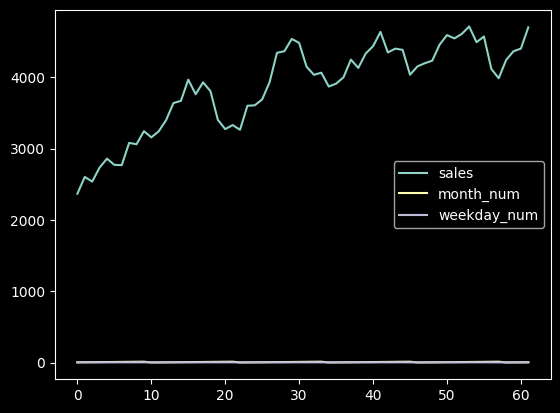

In [ ]:
df['year_month']=df['date'].dt.to_period('M')
df_month_mean=df.groupby('year_month').mean().reset_index().drop('date', axis=1)
df_month_mean.plot()

In [ ]:
del df['year_month']
df_month_mean['month_num']=(df_month_mean['year_month']-df_month_mean['year_month'].min()).apply(lambda x: x.n)
df_month_mean['month_num']

,month_num
0,0
1,1
2,2
3,3
4,4
...,...
57,57
58,58
59,59
60,60


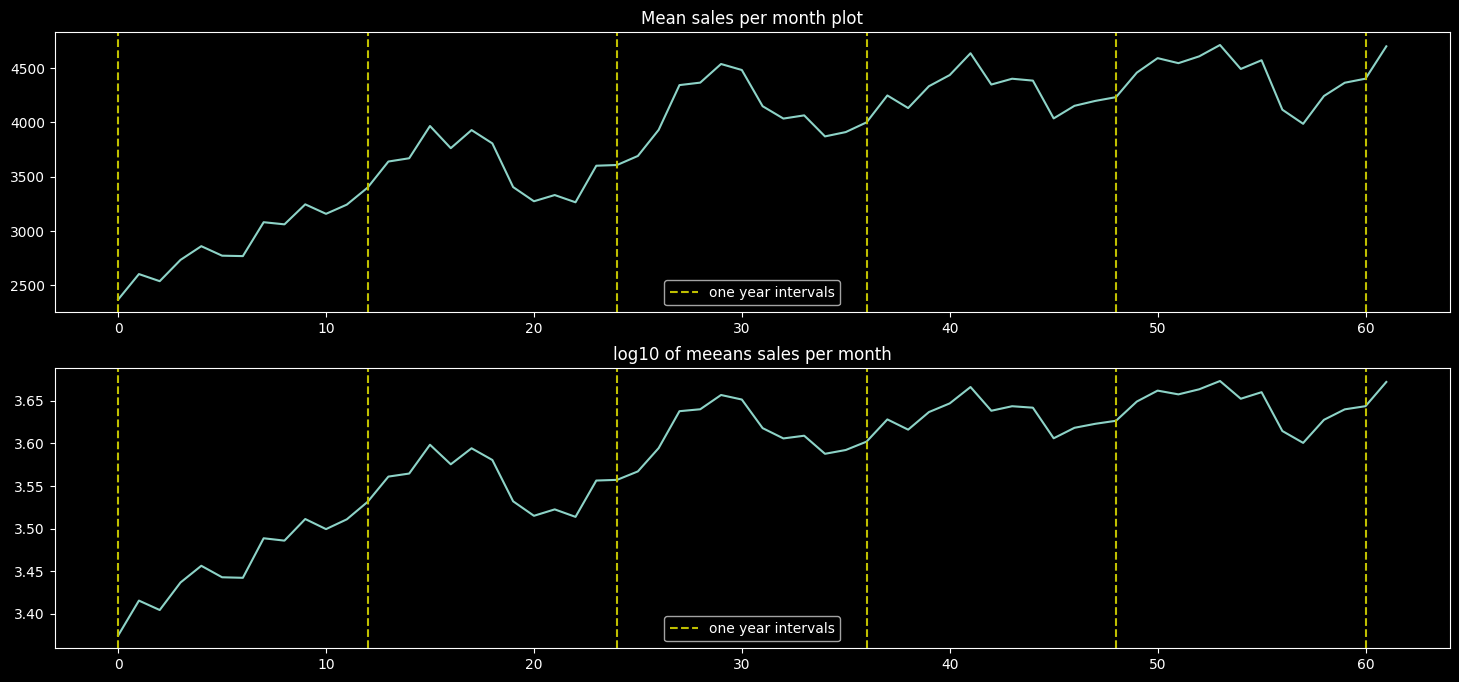

In [ ]:
fig, axs=plt.subplots(2,1, figsize=(18,8))
axs[0].plot(df_month_mean['month_num'], df_month_mean['sales'])
for j in range(12, len(df_month_mean), 12):
  axs[0].axvline(x=j, color='y', linestyle='--')
axs[0].axvline(x=0, color='y', linestyle='--', label='one year intervals')
axs[0].legend()
axs[0].set_title('Mean sales per month plot')

axs[1].plot(df_month_mean['month_num'], np.log10(df_month_mean['sales']))
for j in range(12, len(df_month_mean), 12):
  axs[1].axvline(x=j, color='y', linestyle='--')
axs[1].axvline(x=0, color='y', linestyle='--', label='one year intervals')
axs[1].legend()
axs[1].set_title('log10 of meeans sales per month')

plt.show()

### Model

In [ ]:
df.head(3)

,date,sales,month_num,weekday_num
0,2011-03-25,2223.0,3,4
1,2011-03-26,3175.0,3,5
2,2011-03-27,3264.0,3,6


Our data has two periods: one week and one year. Sales can depend on the day of the week(is it Monday or is it Sunday). Or they can depend on month (is it December or is it May)

In [ ]:
for j in range(1,12):
  df[f"month#{j}"]=(j==df['month_num']).astype(int)
del df['month_num']
for j in range(1,7):
  df[f"weekday#{j}"]=(j==df['weekday_num']).astype(int)
del df['weekday_num']
df['day_num']=range(1, len(df)+1)
df.head()

,date,sales,month#1,month#2,month#3,month#4,month#5,month#6,month#7,month#8,month#9,month#10,month#11,weekday#1,weekday#2,weekday#3,weekday#4,weekday#5,weekday#6,day_num
0,2011-03-25,2223.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
1,2011-03-26,3175.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,2
2,2011-03-27,3264.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3
3,2011-03-28,2262.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4
4,2011-03-29,1733.0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,5


In [ ]:
X=df.drop(['date', 'sales'], axis=1)
y=df['sales']

In [ ]:
model=LinearRegression()
model.fit(X,y)

LinearRegression()

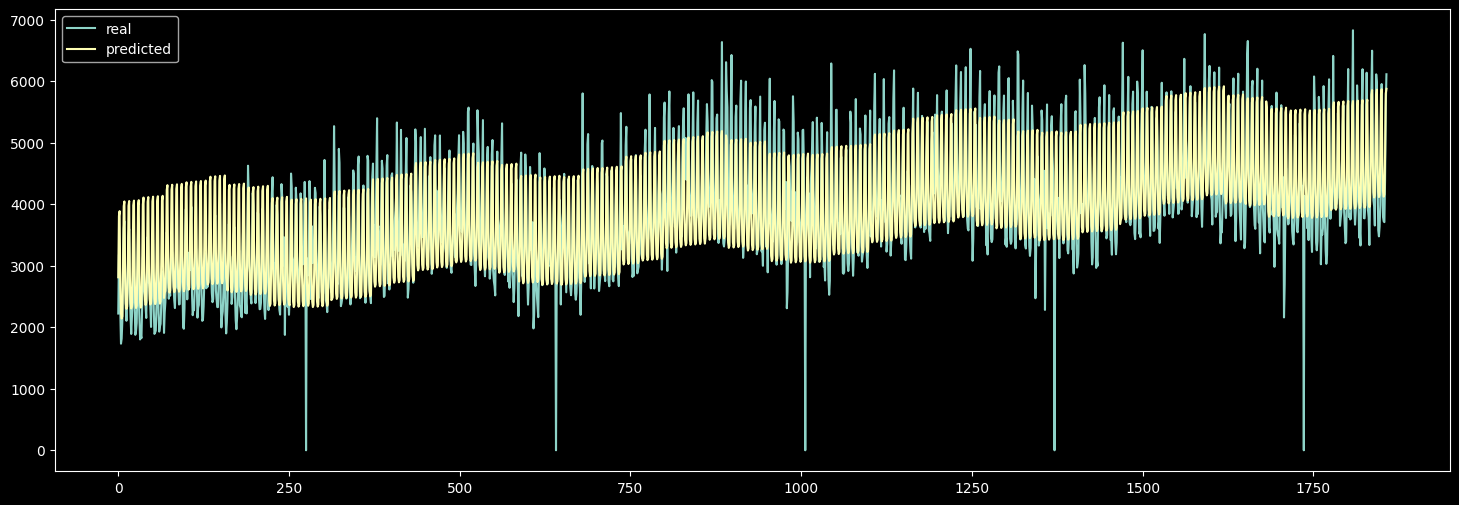

In [ ]:
pred=pd.DataFrame({'real': y, 'predicted': model.predict(X)})
fig, ax = plt.subplots(figsize=(18,6))
pred.plot(ax=ax)
plt.show()

It looks like our model is not doing well. Let's see if model deals better with mean sales per month/week

In [ ]:
df_pred=pd.DataFrame({'date': df['date'].copy(), 'sales': model.predict(X)})
df_pred['year_month']=df_pred['date'].dt.to_period('M')
df_month_mean_pred=df_pred.groupby('year_month').mean().reset_index().drop('date', axis=1)
del df_pred['year_month']
df_month_mean_pred['month_num']=(df_month_mean_pred['year_month']-df_month_mean_pred['year_month'].min()).apply(lambda x: x.n)

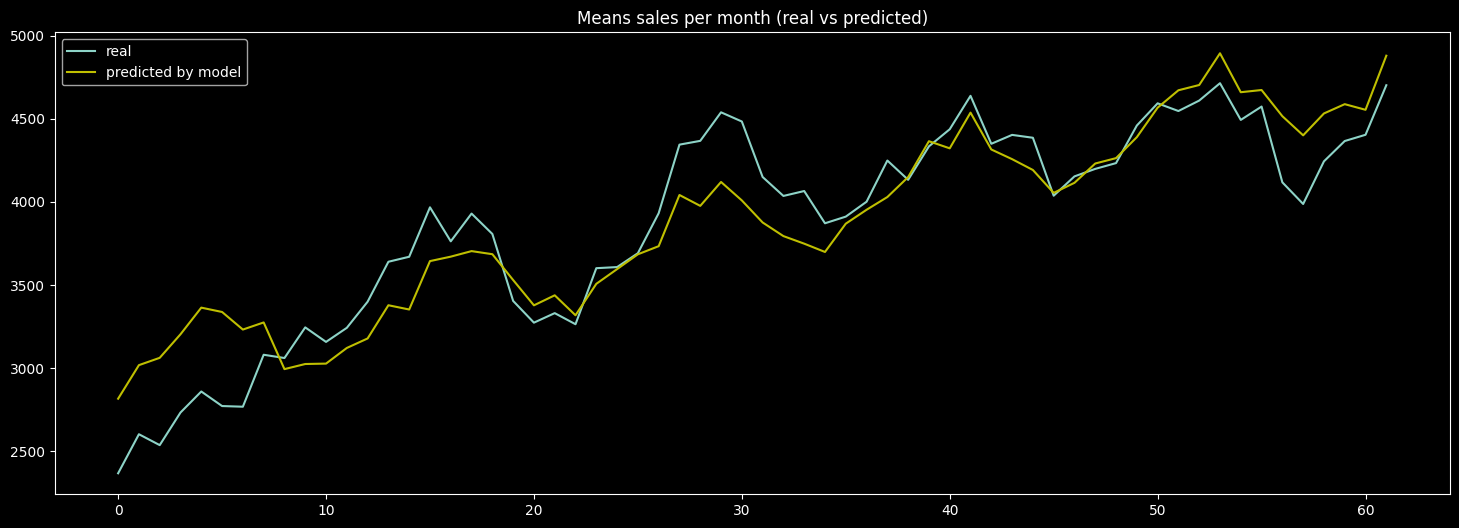

In [ ]:
fig, ax=plt.subplots(figsize=(18,6))
ax.plot(df_month_mean['month_num'], df_month_mean['sales'], label='real')
ax.plot(df_month_mean_pred['month_num'], df_month_mean_pred['sales'], color='y', label='predicted by model')
ax.legend()
ax.set_title('Means sales per month (real vs predicted)')
plt.show()

It looks like our model predicts means sales of each month quite good like for weak regression model which linear regression is.

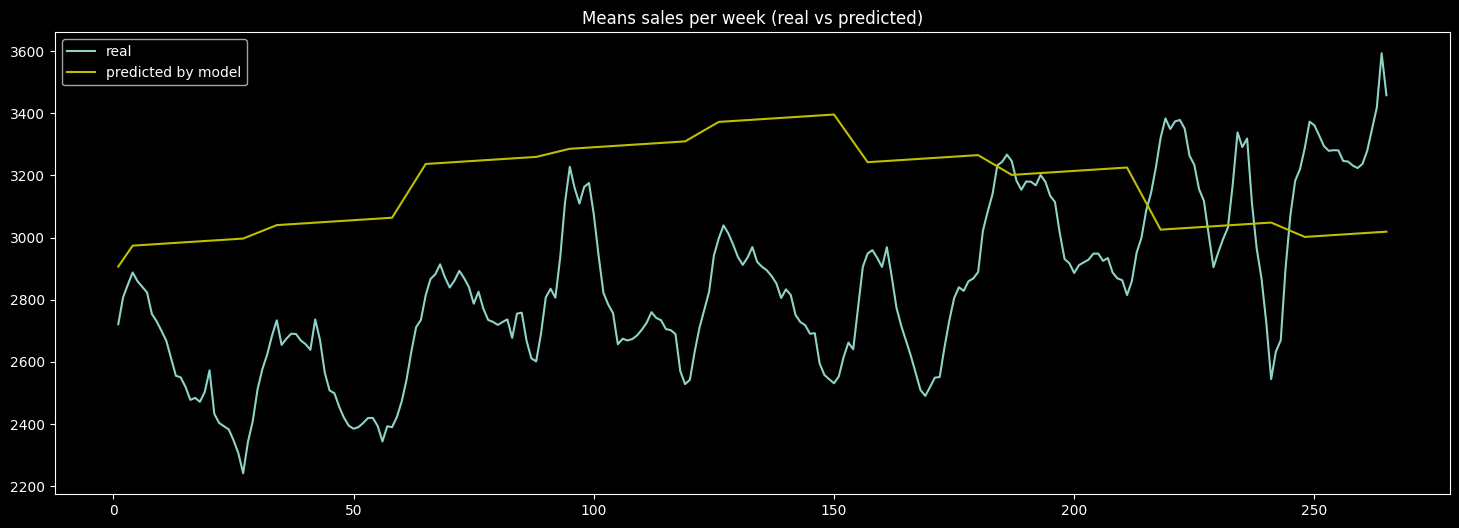

In [ ]:
y=[np.array([df_pred['sales'].iloc[4+j+k] for k in range(7)]).mean() for j in range(265)]
df_week_mean_pred=pd.DataFrame({'week_num': range(1, 266), 'mean_week_sales': y})
fig, ax = plt.subplots(figsize=(18,6))
ax.plot(df_week_mean['week_num'], df_week_mean['mean_week_sales'], label='real')
ax.plot(df_week_mean_pred['week_num'], df_week_mean_pred['mean_week_sales'], color='y', label='predicted by model')
ax.legend()
ax.set_title('Means sales per week (real vs predicted)')
plt.show()

That's really bad. It looks like weekly seasonality has much harder dependence than linear. But for yearly seasonality it works

### Errors

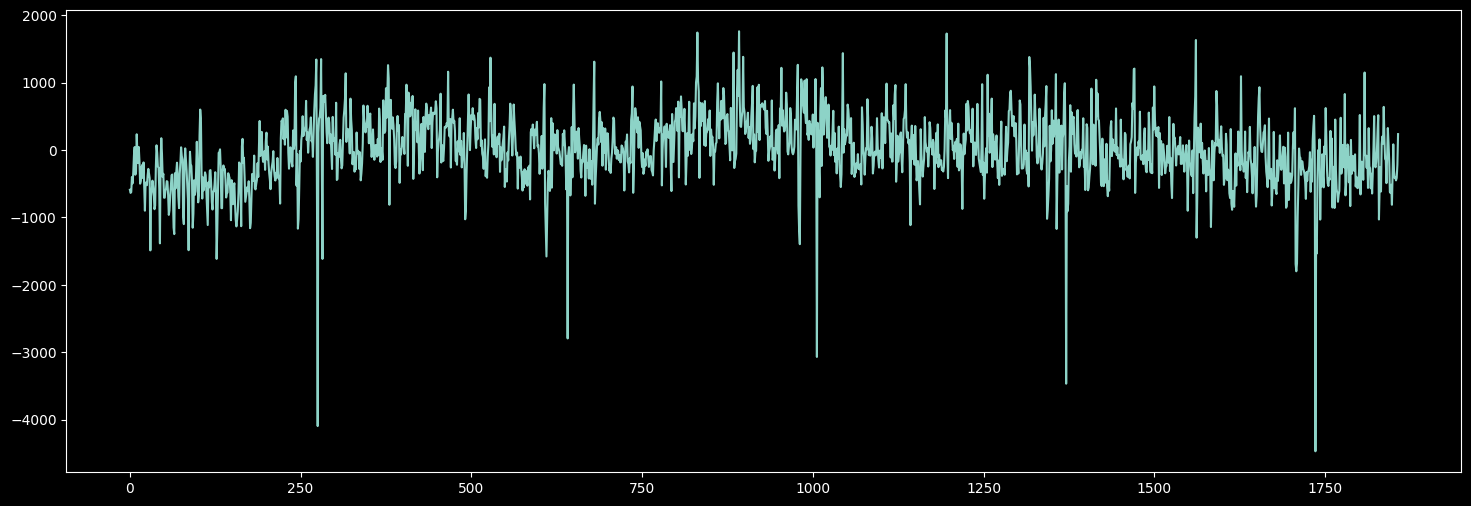

In [ ]:
fig, ax=plt.subplots(figsize=(18,6))
(df['sales']-df_pred['sales']).plot(ax=ax)
plt.show()

### Model_2

In [ ]:
X_2=df[['day_num', 'month#1', 'month#2', 'month#3', 'month#4', 'month#5', 'month#6', 'month#7', 'month#8', 'month#9', 'month#10', 'month#11']]
y=df['sales']
model_2=LinearRegression()
model_2.fit(X_2, y)

LinearRegression()

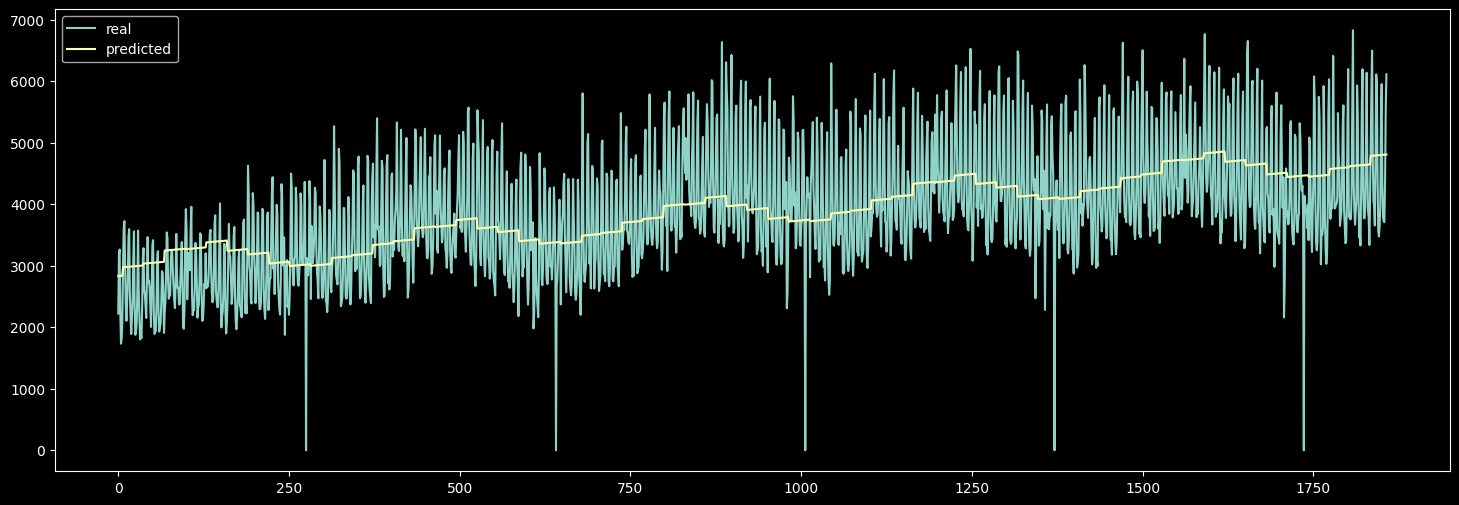

In [ ]:
fig, ax=plt.subplots(figsize=(18,6))
pd.DataFrame({'real': y, 'predicted': model_2.predict(X_2)}).plot(ax=ax)
plt.show()

In [ ]:
df_pred_2=pd.DataFrame({'date': df['date'].copy(), 'sales': model_2.predict(X_2)})
df_pred_2['year_month']=df_pred_2['date'].dt.to_period('M')
df_month_mean_pred_2=df_pred_2.groupby('year_month').mean().reset_index().drop('date', axis=1)
del df_pred_2['year_month']
df_month_mean_pred_2['month_num']=(df_month_mean_pred_2['year_month']-df_month_mean_pred_2['year_month'].min()).apply(lambda x: x.n)
df_month_mean_pred_2.head()

,year_month,sales,month_num
0,2011-03,2833.904322,0
1,2011-04,2989.287038,1
2,2011-05,3048.982584,2
3,2011-06,3261.086670,3
4,2011-07,3283.163229,4


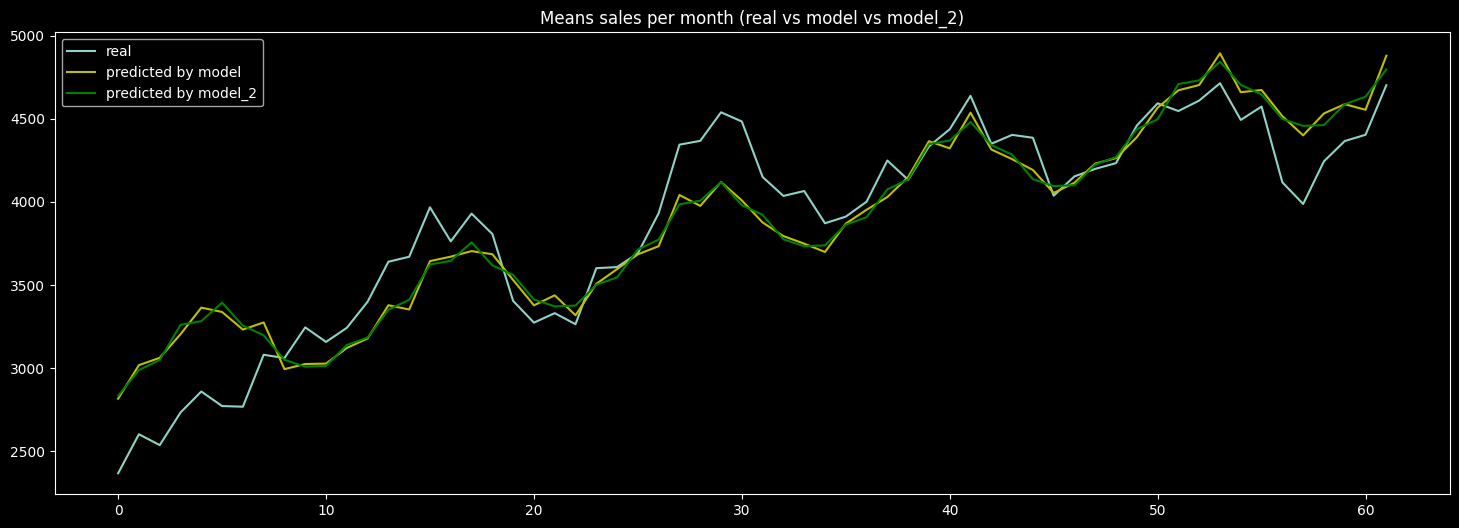

In [ ]:
fig, ax=plt.subplots(figsize=(18,6))
ax.plot(df_month_mean['month_num'], df_month_mean['sales'], label='real')
ax.plot(df_month_mean_pred['month_num'], df_month_mean_pred['sales'], color='y', label='predicted by model')
ax.plot(df_month_mean_pred_2['month_num'], df_month_mean_pred_2['sales'], color='g', label='predicted by model_2')
ax.legend()
ax.set_title('Means sales per month (real vs model vs model_2)')
plt.show()

Almost the same as model

### Model_3

In [ ]:
X_3=df[['day_num', 'weekday#1', 'weekday#2', 'weekday#3', 'weekday#4', 'weekday#5', 'weekday#6']]
y=df['sales']
model_3=LinearRegression()
model_3.fit(X_3, y)

LinearRegression()

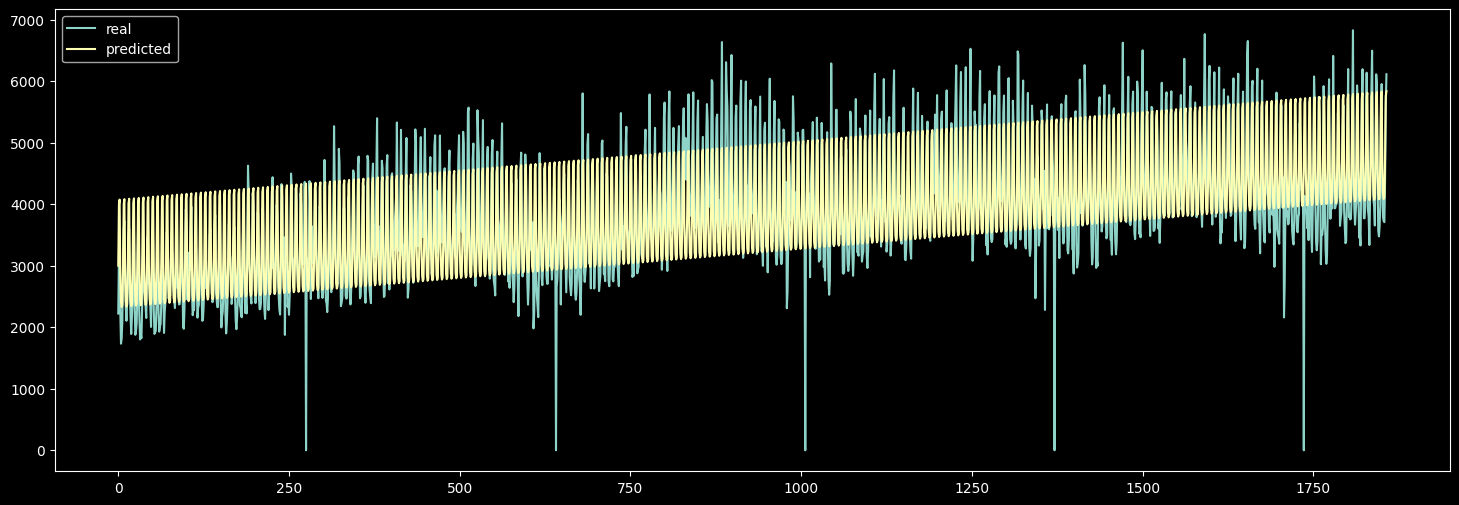

In [ ]:
fig, ax=plt.subplots(figsize=(18,6))
pd.DataFrame({'real': y, 'predicted': model_3.predict(X_3)}).plot(ax=ax)
plt.show()

In [ ]:
df_pred_3=pd.DataFrame({'date': df['date'].copy(), 'sales': model_3.predict(X_3)})
df_pred_3['year_month']=df_pred_3['date'].dt.to_period('M')
df_month_mean_pred_3=df_pred_3.groupby('year_month').mean().drop('date', axis=1).reset_index()
del df_pred_3['year_month']
df_month_mean_pred_3['month_num']=(df_month_mean_pred_3['year_month']-df_month_mean_pred_3['year_month'].min()).apply(lambda x: x.n)

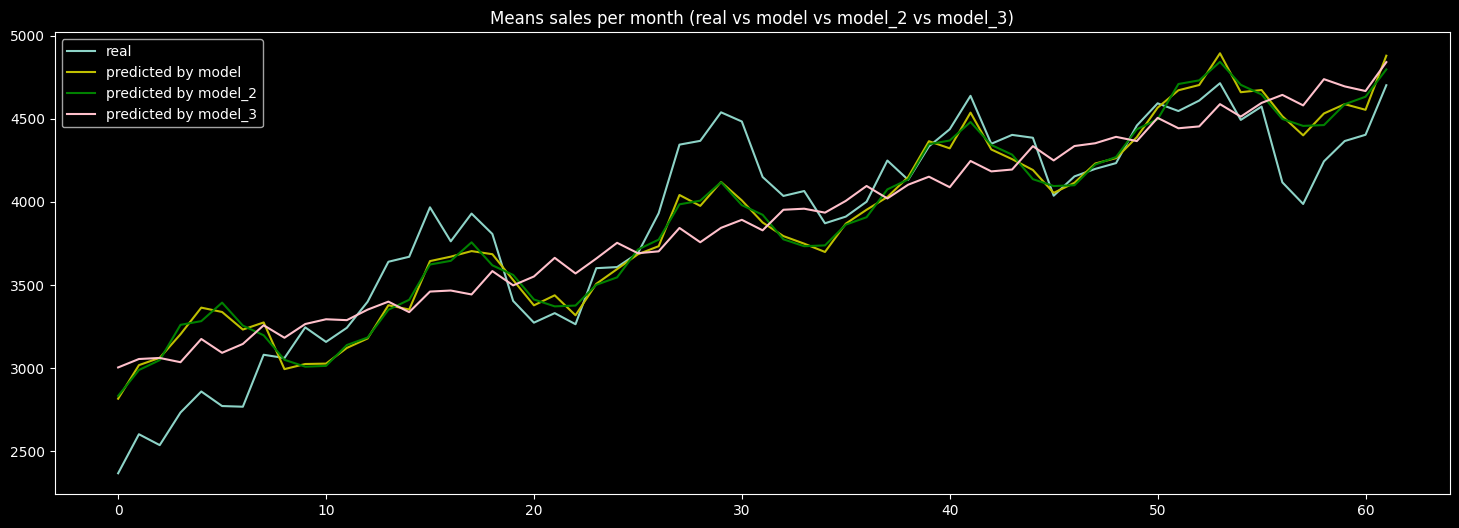

In [ ]:
fig, ax=plt.subplots(figsize=(18,6))
ax.plot(df_month_mean['month_num'], df_month_mean['sales'], label='real')
ax.plot(df_month_mean_pred['month_num'], df_month_mean_pred['sales'], color='y', label='predicted by model')
ax.plot(df_month_mean_pred_2['month_num'], df_month_mean_pred_2['sales'], color='g', label='predicted by model_2')
ax.plot(df_month_mean_pred_3['month_num'], df_month_mean_pred_3['sales'], color='pink', label='predicted by model_3')
ax.legend()
ax.set_title('Means sales per month (real vs model vs model_2 vs model_3)')
plt.show()

Model and model_2 look better because they contain periodic of real sales.

### Conclusion

Before we started analyzing this dataset we already knew that linear regression is a bad tool to do predictions. But sometimes it works, especially, when we work with time series with seasonality. Our model has big problems with predicting sales for a day or predicting mean sales per week. But it predicts mean sales per month relatively good. So our job wich got left is to calculate $R^2$ and make predictions for the next year

In [ ]:
print(f"R^2: {1-((df_month_mean['sales']-df_month_mean_pred['sales']).apply(lambda x: x**2).sum())/((df_month_mean['sales']-df_month_mean['sales'].mean()).apply(lambda x: x**2).sum())}")

R^2: 0.8327738389354149


In [ ]:
df_nextyear_pred=pd.DataFrame({'date': pd.date_range('2016-04-01', '2017-04-25')})
df_nextyear_pred['year_month']=df_nextyear_pred['date'].dt.to_period('M')
df_nextyear_pred['month_num']=df_nextyear_pred['date'].dt.month
df_nextyear_pred['weekday_num']=df_nextyear_pred['date'].dt.dayofweek
for j in range(1,12):
  df_nextyear_pred[f"month#{j}"]=(j==df_nextyear_pred['month_num']).astype(int)
del df_nextyear_pred['month_num']
for j in range(1,7):
  df_nextyear_pred[f"weekday#{j}"]=(j==df_nextyear_pred['weekday_num']).astype(int)
del df_nextyear_pred['weekday_num']
df_nextyear_pred['day_num']=range(df['day_num'].max()+1, df['day_num'].max()+391)
df_nextyear_pred['sales']=model.predict(df_nextyear_pred.drop(['date', 'year_month'], axis=1))

In [ ]:
df_mean_month_nextyear_pred=df_nextyear_pred.groupby('year_month').mean().reset_index().drop('date', axis=1)
df_mean_month_nextyear_pred['month_num']=range(df_month_mean['month_num'].max(), df_month_mean['month_num'].max()+13)

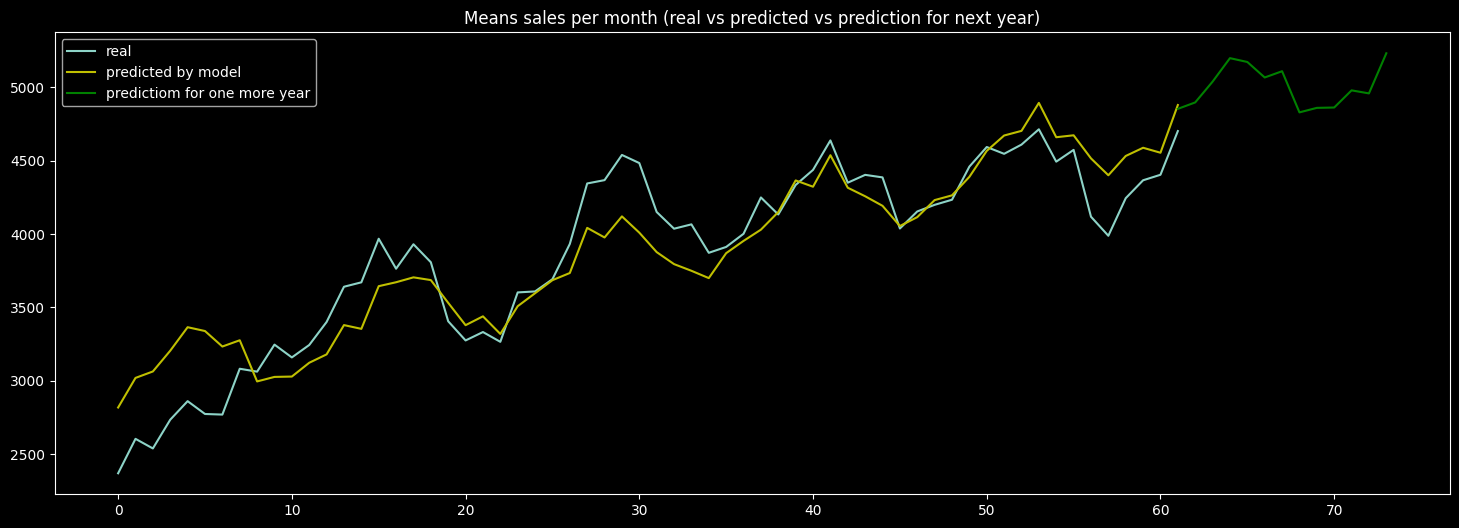

In [ ]:
fig, ax=plt.subplots(figsize=(18,6))
ax.plot(df_month_mean['month_num'], df_month_mean['sales'], label='real')
ax.plot(df_month_mean_pred['month_num'], df_month_mean_pred['sales'], color='y', label='predicted by model')
ax.plot(df_mean_month_nextyear_pred['month_num'], df_mean_month_nextyear_pred['sales'], color='g', label='predictiom for one more year')
ax.legend()
ax.set_title('Means sales per month (real vs predicted vs prediction for next year)')
plt.show()

In [ ]:
len(df_mean_month_nextyear_pred)

13

In [ ]:
df_mean_month_nextyear_pred['month']=pd.Series(pd.date_range('2016-04-01', '2017-05-01', freq='M')).dt.month_name()
df_mean_month_nextyear_pred[['month', 'sales']]

<ipython-input-83-b94ce2d35b5b>:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_mean_month_nextyear_pred['month']=pd.Series(pd.date_range('2016-04-01', '2017-05-01', freq='M')).dt.month_name()


,month,sales
0,April,4852.892626
1,May,4896.812886
2,June,5038.493065
3,July,5198.582036
4,August,5172.448369
5,September,5066.780497
6,October,5109.536962
7,November,4828.930973
8,December,4859.678503
9,January,4862.083854


## DF_2

In [ ]:
! gdown --id 1Hi4DO_g5L3cuGi3SlgtmRXb02A_YcjCh

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1Hi4DO_g5L3cuGi3SlgtmRXb02A_YcjCh
To: /content/Fish.csv
100% 6.02k/6.02k [00:00<00:00, 12.1MB/s]


The dataset is structured in such a way that each row corresponds to a single fish with its species and various physical measurements (length, height, and width). The goal is to make a model which will predict the weight of fish based on these predictors.

In [ ]:
df=pd.read_csv('/content/Fish.csv')
df

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


In [ ]:
df.describe(include='all')

,Species,Weight,Length1,Length2,Length3,Height,Width
count,159,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
unique,7,NaN,NaN,NaN,NaN,NaN,NaN
top,Perch,NaN,NaN,NaN,NaN,NaN,NaN
freq,56,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,NaN,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,NaN,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,NaN,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,NaN,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,NaN,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500


In [ ]:
df=pd.get_dummies(df).astype(int)

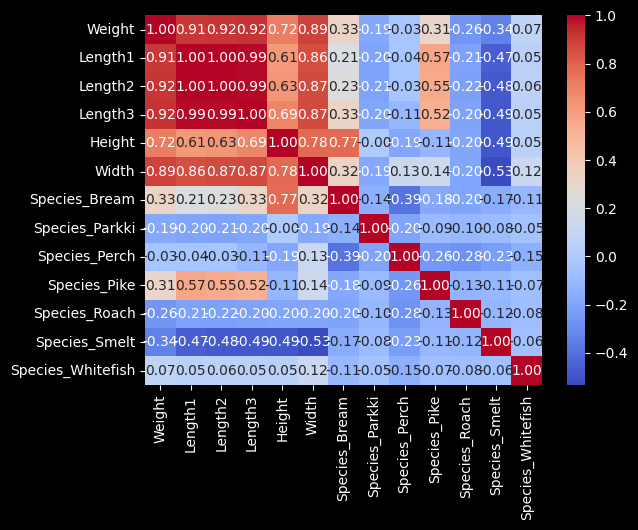

In [ ]:
fig, ax =plt.subplots()
sns.heatmap(df.corr(), ax=ax, cmap='coolwarm', annot=True, fmt='.2f')
plt.show()

In [ ]:
pca=PCA()
pca.fit(df[['Length1', 'Length2', 'Length3', 'Height', 'Width']])

PCA()

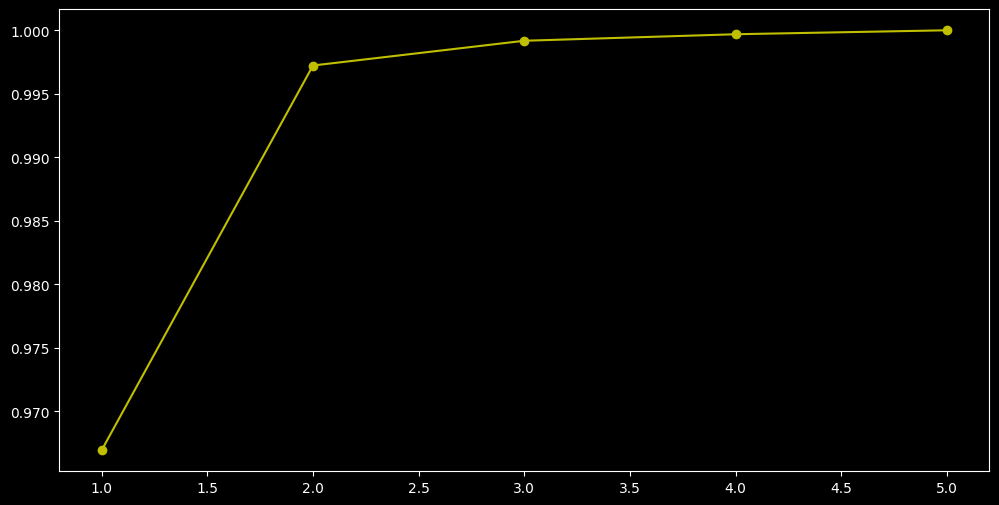

In [ ]:
fig, ax = plt.subplots(figsize=(12,6))
ax.plot(range(1,6), np.cumsum(pca.explained_variance_ratio_), color='y', marker='o')
plt.show()

In [ ]:
df[['f_1', 'f_2']]=PCA(n_components=2).fit_transform(df[['Length1', 'Length2', 'Length3', 'Height', 'Width']])

In [ ]:
df

,Weight,Length1,Length2,Length3,Height,Width,Species_Bream,Species_Parkki,Species_Perch,Species_Pike,Species_Roach,Species_Smelt,Species_Whitefish,f_1,f_2
0,242,23,25,30,11,4,1,0,0,0,0,0,0,-3.450205,3.528439
1,290,24,26,31,12,4,1,0,0,0,0,0,0,-1.595527,4.174520
2,340,23,26,31,12,4,1,0,0,0,0,0,0,-2.121602,4.411047
3,363,26,29,33,12,4,1,0,0,0,0,0,0,2.378587,3.414487
4,430,26,29,34,12,5,1,0,0,0,0,0,0,3.067556,3.659080
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154,12,11,12,13,2,1,0,0,0,0,0,1,0,-29.108636,-2.191509
155,13,11,12,13,2,1,0,0,0,0,0,1,0,-29.108636,-2.191509
156,12,12,13,13,2,1,0,0,0,0,0,1,0,-28.015786,-2.599028
157,19,13,14,15,2,2,0,0,0,0,0,1,0,-25.623148,-2.648955


In [ ]:
X=df[['f_1', 'f_2', 'Species_Bream', 'Species_Parkki', 'Species_Perch', 'Species_Pike', 'Species_Roach', 'Species_Smelt', 'Species_Whitefish']]
y=df['Weight']

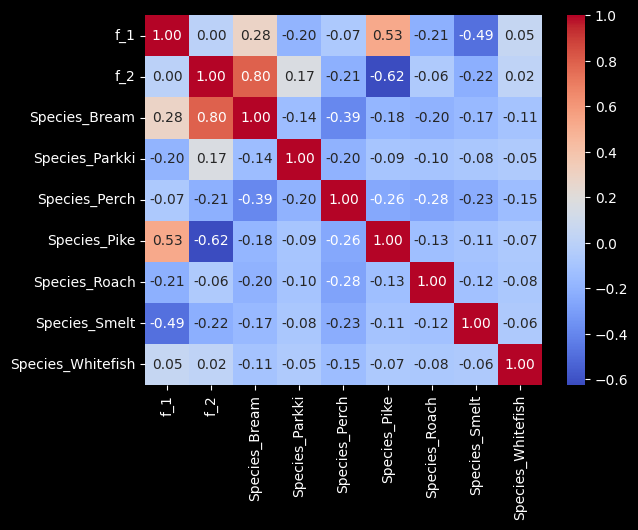

In [ ]:
fig, ax=plt.subplots()
sns.heatmap(X.corr(), ax=ax, cmap='coolwarm', annot=True, fmt='0.2f')
plt.show()

In [ ]:
pca=PCA()
pca.fit(X.drop(['f_1', 'f_2'], axis=1))

PCA()

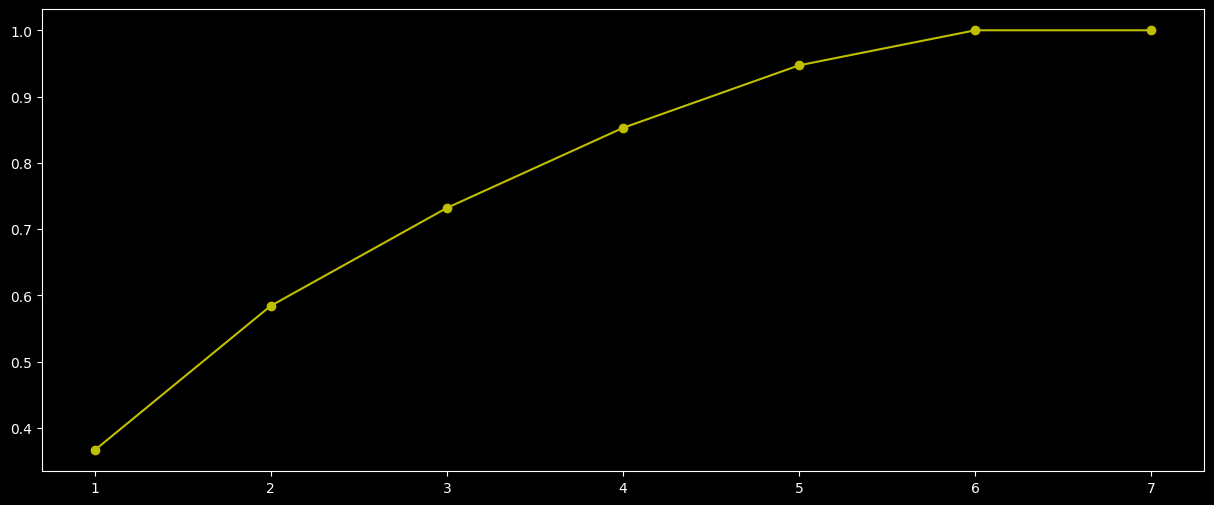

In [ ]:
fig, ax = plt.subplots(figsize=(15,6))
ax.plot(range(1, len(pca.components_)+1), np.cumsum(pca.explained_variance_ratio_), color='y', marker='o')
plt.show()

In [ ]:
df[['f_3', 'f_4', 'f_5', 'f_6', 'f_7']]=PCA(n_components=5).fit_transform(X.drop(['f_1', 'f_2'], axis=1))

In [ ]:
X=df[[f"f_{j}" for j in range(1,8)]]

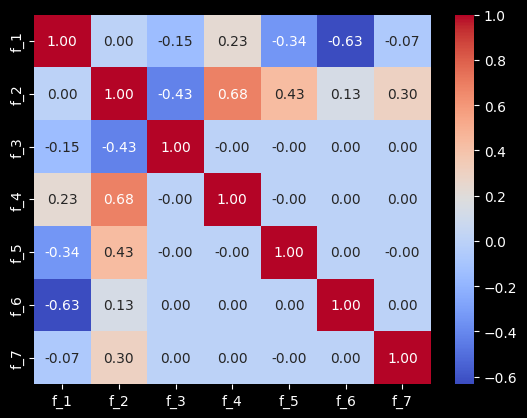

In [ ]:
fig, ax=plt.subplots()
sns.heatmap(X.corr(), ax=ax, cmap='coolwarm', annot=True, fmt='.2f')
plt.show()

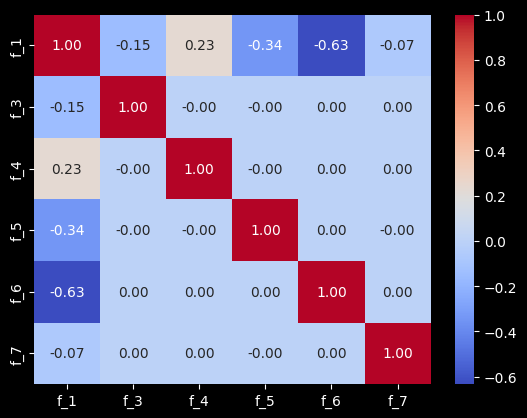

In [ ]:
fig, ax=plt.subplots()
sns.heatmap(X.drop('f_2', axis=1).corr(), ax=ax, cmap='coolwarm', annot=True, fmt='.2f')
plt.show()

### Model_1

In [ ]:
model_1=LinearRegression()
X_1=X.drop('f_2', axis=1)
model_1.fit(X_1, y)

LinearRegression()

In [ ]:
print(f"R^2: {model_1.score(X_1, y)}")

R^2: 0.9328872674533065


In [ ]:
len(y[y==0])

1

In [ ]:
pred_1=pd.DataFrame({'real': y, 'pred': model_1.predict(X_1)})
pred_1=pred_1[pred_1['real']!=0]
(np.abs((pred_1['real']-pred_1['pred']))/pred_1['real']).median()

0.16414374436615556

On average error is 16.5% of real value. This model is not good

### Model_2

In [ ]:
df=df.drop([f"f_{j}" for j in range(1,8)], axis=1)

In [ ]:
df

,Weight,Length1,Length2,Length3,Height,Width,Species_Bream,Species_Parkki,Species_Perch,Species_Pike,Species_Roach,Species_Smelt,Species_Whitefish
0,242,23,25,30,11,4,1,0,0,0,0,0,0
1,290,24,26,31,12,4,1,0,0,0,0,0,0
2,340,23,26,31,12,4,1,0,0,0,0,0,0
3,363,26,29,33,12,4,1,0,0,0,0,0,0
4,430,26,29,34,12,5,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
154,12,11,12,13,2,1,0,0,0,0,0,1,0
155,13,11,12,13,2,1,0,0,0,0,0,1,0
156,12,12,13,13,2,1,0,0,0,0,0,1,0
157,19,13,14,15,2,2,0,0,0,0,0,1,0


In [ ]:
pca=PCA()
pca.fit(StandardScaler().fit_transform(df.drop('Weight', axis=1)))

PCA()

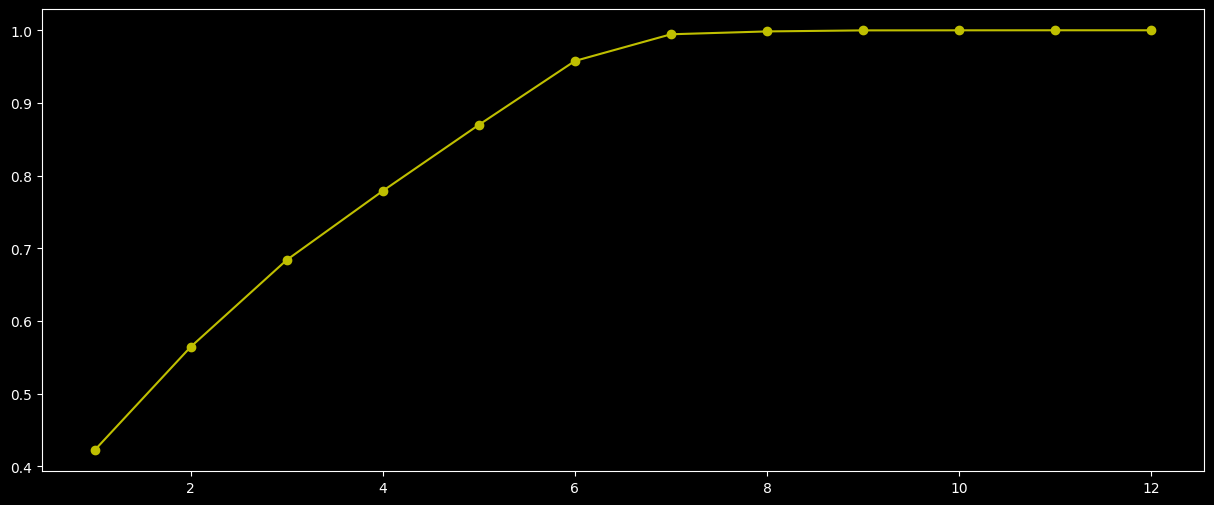

In [ ]:
fig, ax = plt.subplots(figsize=(15,6))
ax.plot(range(1, 1+len(pca.components_)), np.cumsum(pca.explained_variance_ratio_), color='y', marker='o')
plt.show()

In [ ]:
df[[f"f_{j}" for j in range(1,8)]]=PCA(n_components=7).fit_transform(StandardScaler().fit_transform(df.drop('Weight', axis=1)))

In [ ]:
df.head(3)

,Weight,Length1,Length2,Length3,Height,Width,Species_Bream,Species_Parkki,Species_Perch,Species_Pike,Species_Roach,Species_Smelt,Species_Whitefish,f_1,f_2,f_3,f_4,f_5,f_6,f_7
0,242,23,25,30,11,4,1,0,0,0,0,0,0,0.394469,1.858821,-0.330720,-0.420954,-0.500681,-0.227764,-0.865734
1,290,24,26,31,12,4,1,0,0,0,0,0,0,0.597166,1.920960,-0.333789,-0.422937,-0.492498,-0.234663,-0.808605
2,340,23,26,31,12,4,1,0,0,0,0,0,0,0.554659,1.940023,-0.327643,-0.421829,-0.492408,-0.233409,-0.824127


In [ ]:
X_2=df[[f"f_{j}" for j in range(1,8)]]
y=df['Weight']
model_2=LinearRegression()
model_2.fit(X_2, y)

LinearRegression()

In [ ]:
print(f"R^2: {model_2.score(X_2, y)}")

R^2: 0.9239047071046053


In [ ]:
pred_2=pd.DataFrame({'real': y, 'pred': model_2.predict(X_2)})
pred_2=pred_2[pred_2['real']!=0]
(np.abs(pred_2['real']-pred_2['pred'])/pred_2['real']).median()

0.1763458721973098